## Extract data

Create a data-file for use throughout the project.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data_dir = f'/Users/sw376/Dropbox/Research/data/simulations/flares'
output_data_dir = '../../data'

# contains the particle information of the BHs along with the BHs belonging to each galaxy
blackhole_file = f'{input_data_dir}/flares_bh.hdf5'

# contains everything
master_file = f'{input_data_dir}/flares_no_particlesed.hdf5'

# contains the averaged accretion rates of BHs.
averaged_accretion_rates_file = f'{output_data_dir}/flares_bhproperties.h5'

# the new master file
output_file = f'{output_data_dir}/flares_blackholes.hdf5'


In [3]:
from unyt import Msun, yr, g, s

mass_conversion = 1E10
accretion_rate_conversion = (6.446E23 * g/s).to('Msun/yr').value

mass_units = Msun
accretion_rate_units = Msun / yr

In [9]:
with h5py.File(output_file, 'w') as hfout:

    with h5py.File(master_file, 'r') as master:

        sims = list(master.keys())
        tags = list(master[sims[0]].keys())
        print(sims)
        print(tags)

        for sim in sims:
            for tag in tags:
                hfout[f'{sim}/{tag}/Galaxy/master/blackhole_mass'] = master[f'{sim}/{tag}/Galaxy/BH_Mass'][:] * mass_conversion
                hfout[f'{sim}/{tag}/Galaxy/master/blackhole_accretion_rate/instant'] = master[f'{sim}/{tag}/Galaxy/BH_Mdot'][:] * accretion_rate_conversion

    hfout[f'{sim}/{tag}'].visit(print)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']
['005_z010p000', '006_z009p000', '007_z008p000', '008_z007p000', '009_z006p000', '010_z005p000']
Galaxy
Galaxy/master
Galaxy/master/blackhole_accretion_rate
Galaxy/master/blackhole_accretion_rate/instant
Galaxy/master/blackhole_mass


### Add some other quantities

In [4]:
with h5py.File(master_file, 'r') as master:

    sims = list(master.keys())
    tags = list(master[sims[0]].keys())
    print(sims)
    print(tags)

    master[f'{sims[0]}/{tags[0]}'].visit(print)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']
['005_z010p000', '006_z009p000', '007_z008p000', '008_z007p000', '009_z006p000', '010_z005p000']
Galaxy
Galaxy/BH_Age
Galaxy/BH_Coordinates
Galaxy/BH_Mass
Galaxy/BH_Mdot
Galaxy/BH_los
Galaxy/BH_sml
Galaxy/BPASS_2.2.1
Galaxy/BPASS_2.2.1/Chabrier300
Galaxy/BPASS_2.2.1/Chabrier300/Flux
Galaxy/BPASS_2.2.1/Chabrier300/Flux/DustModelI
Galaxy/BPASS_2.2.1/Chabrier300/Flux/DustModelI/Euclid
Galaxy/BPASS_2.2.1/Chabrier300/Flux/DustModelI/Euclid/NISP
Galaxy/BPASS_2.2.1/Chabrier300/Flux/DustModelI/Euclid/NISP/H
Galaxy/BPASS_2.2.1/Chabrier300/Flux/DustModelI/Euclid/NISP/J
Galaxy/BPASS_2.2.1/Chabrier300/Flux/DustModelI/Euclid/NISP/Y
Galaxy/BPASS_2.2.1/Chabrier300/Flux/DustModelI/Euclid/VIS
Galaxy/BPASS_2.2.1/Chabrier300/Flux/DustModelI/Euclid/VIS/VIS
Galaxy/BPASS

In [6]:
with h5py.File(output_file, 'a') as hfout:

    with h5py.File(master_file, 'r') as master:

        sims = list(master.keys())
        tags = list(master[sims[0]].keys())
        print(sims)
        print(tags)

        # master[f'{sims[0]}/{tags[0]}'].visit(print)

        datasets_to_copy = [
            ['BPASS_2.2.1/Chabrier300/Lines/DustModelI/HI6563/EW', 'attenuated_stellar_halpha_ew'],
            ['BPASS_2.2.1/Chabrier300/Lines/DustModelI/HI6563/Luminosity', 'attenuated_stellar_halpha_luminosity'],
            ['BPASS_2.2.1/Chabrier300/Lines/Intrinsic/HI6563/EW', 'intrinsic_stellar_halpha_ew'],
            ['BPASS_2.2.1/Chabrier300/Lines/Intrinsic/HI6563/Luminosity', 'intrinsic_stellar_halpha_luminosity'],
            ['Mstar_30', 'stellar_mass'],
            ['SFR/SFR_10', 'star_formation_rate'],
        ]

        for sim in sims:
            for tag in tags:
                for dataset in datasets_to_copy:
                    old, new = dataset
                    if f'{sim}/{tag}/Galaxy/master/{new}' in hfout.keys():
                        del hfout[f'{sim}/{tag}/Galaxy/master/{new}']
                    hfout[f'{sim}/{tag}/Galaxy/master/{new}'] = master[f'{sim}/{tag}/Galaxy/{old}'][:] 
                   
        hfout[f'{sim}/{tag}'].visit(print)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']
['005_z010p000', '006_z009p000', '007_z008p000', '008_z007p000', '009_z006p000', '010_z005p000']
Galaxy
Galaxy/details
Galaxy/details/blackhole_accretion_rate
Galaxy/details/blackhole_accretion_rate/10
Galaxy/details/blackhole_accretion_rate/100
Galaxy/details/blackhole_accretion_rate/20
Galaxy/details/blackhole_accretion_rate/200
Galaxy/details/blackhole_accretion_rate/50
Galaxy/details/blackhole_accretion_rate/instant
Galaxy/details/blackhole_mass
Galaxy/master
Galaxy/master/attenuated_stellar_halpha_ew
Galaxy/master/attenuated_stellar_halpha_luminosity
Galaxy/master/blackhole_accretion_rate
Galaxy/master/blackhole_accretion_rate/instant
Galaxy/master/blackhole_id
Galaxy/master/blackhole_mass
Galaxy/master/intrinsic_stellar_halpha_ew
Galaxy/master

#### Find the most massive BH in each galaxy and add it as a new dataset

In [11]:

with h5py.File(output_file, 'a') as output_hf:

    with h5py.File(blackhole_file, 'r') as blackhole_hf:

        sims = list(output_hf.keys())
        tags = list(output_hf[sims[0]].keys())

        # sims = sims[:1]
        # tags = tags[-1:]

        for sim in sims:

            for tag in tags:

                start = 0

                n_galaxies = len(output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_mass'][:])

                # blackhole_ids = np.zeros(n_galaxies, dtype=np.int64)
                blackhole_ids = np.zeros(n_galaxies)
                blackhole_masses = np.zeros(n_galaxies)
                blackhole_accretion_rates = np.zeros(n_galaxies)

                for i in range(n_galaxies):

                    BH_length = blackhole_hf[f'{sim}/{tag}/Galaxy/BH_Length'][i]

                    # check if the galaxy has BHs
                    if BH_length > 0:

                        individual_blackhole_masses = blackhole_hf[f'{sim}/{tag}/Particle/BH_Mass'][start:start+BH_length]
                        individual_blackhole_accretion_rates = blackhole_hf[f'{sim}/{tag}/Particle/BH_Mdot'][start:start+BH_length]
                        individual_bh_ids = blackhole_hf[f'{sim}/{tag}/Particle/BH_ID'][start:start+BH_length]#.astype(np.int64)
                        
                        largest_blackhole_index = np.argmax(individual_blackhole_masses)

                        blackhole_ids[i] = individual_bh_ids[largest_blackhole_index]
                        blackhole_masses[i] = individual_blackhole_masses[largest_blackhole_index]
                        blackhole_accretion_rates[i] = individual_blackhole_accretion_rates[largest_blackhole_index]

                    # update start
                    start += BH_length

                output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_id'] = blackhole_ids

                output_hf[f'{sim}/{tag}/Galaxy/master2/blackhole_mass'] = blackhole_masses * mass_conversion
                # the units here are incorrect
                output_hf[f'{sim}/{tag}/Galaxy//master2/blackhole_accretion_rate/instant'] = blackhole_accretion_rates

                print('number of galaxies with no blackholes', np.sum(blackhole_ids==0))
                print('number of galaxies with blackholes', np.sum(blackhole_ids!=0))

number of galaxies with no blackholes 1258
number of galaxies with blackholes 236
number of galaxies with no blackholes 1912
number of galaxies with blackholes 531
number of galaxies with no blackholes 2871
number of galaxies with blackholes 1072
number of galaxies with no blackholes 3999
number of galaxies with blackholes 1940
number of galaxies with no blackholes 5086
number of galaxies with blackholes 3328
number of galaxies with no blackholes 6019
number of galaxies with blackholes 5275
number of galaxies with no blackholes 1177
number of galaxies with blackholes 215
number of galaxies with no blackholes 1912
number of galaxies with blackholes 487
number of galaxies with no blackholes 2812
number of galaxies with blackholes 1019
number of galaxies with no blackholes 3922
number of galaxies with blackholes 1867
number of galaxies with no blackholes 4873
number of galaxies with blackholes 3346
number of galaxies with no blackholes 5796
number of galaxies with blackholes 5225
number o

In [12]:
with h5py.File(output_file, 'r') as output_hf:
    sims = list(output_hf.keys())
    print(sims)
    tags = list(output_hf[sims[0]].keys())
    print(tags)
    sim = sims[0]
    tag = tags[-1]
    output_hf[f'{sim}/{tag}'].visit(print)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']
['005_z010p000', '006_z009p000', '007_z008p000', '008_z007p000', '009_z006p000', '010_z005p000']
Galaxy
Galaxy/master
Galaxy/master/blackhole_accretion_rate
Galaxy/master/blackhole_accretion_rate/instant
Galaxy/master/blackhole_id
Galaxy/master/blackhole_mass
Galaxy/master/star_formation_rate
Galaxy/master/stellar_bolometric_luminosity
Galaxy/master/stellar_mass
Galaxy/master2
Galaxy/master2/blackhole_accretion_rate
Galaxy/master2/blackhole_accretion_rate/instant
Galaxy/master2/blackhole_mass


### Some checking

Let's check that these BH masses and accretion rates are the same

5272
5275
5.168962501129439 8.790677612318012
5.168962501129439 8.790677612318012


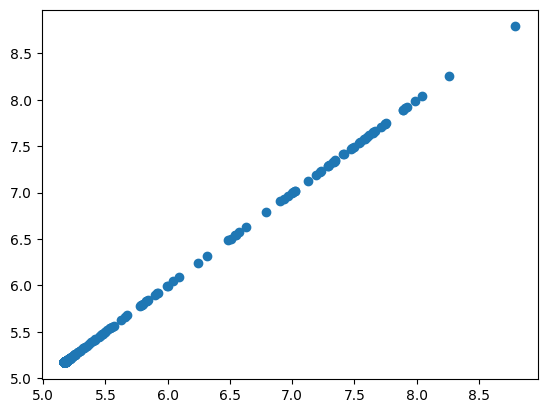

In [13]:

sim = sims[0]
tag = tags[-1]

with h5py.File(output_file, 'r') as output_hf:

    x = output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_mass'][:]
    y = output_hf[f'{sim}/{tag}/Galaxy/master2/blackhole_mass'][:]

    print(np.sum(x>0.0))
    print(np.sum(y>0.0))

    y = y[x>0.0]
    x = x[x>0.0]

    print(np.min(np.log10(x)), np.max(np.log10(x)))
    print(np.min(np.log10(y)), np.max(np.log10(y)))

    plt.scatter(np.log10(x),np.log10(y))
    plt.show()

1.5870724346364852e-26
-16.404141216576587 0.22223301819383504
-16.403691091482518 0.22268314328790198


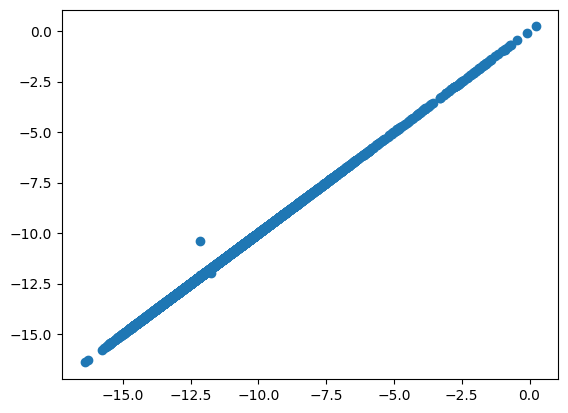

In [14]:
conv2 = (1*g/s).to('Msun/yr').value

print(conv2)

with h5py.File(output_file, 'r') as output_hf:

    x = output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_accretion_rate/instant'][:] # Msun/yr

    # the accretion rates in this file were incorrectly converted. They shouldn't be used.
    y = output_hf[f'{sim}/{tag}/Galaxy/master2/blackhole_accretion_rate/instant'][:] * accretion_rate_conversion / conv2 / 0.677

    y = y[x>0.0]
    x = x[x>0.0]

    print(np.min(np.log10(x)), np.max(np.log10(x)))
    print(np.min(np.log10(y)), np.max(np.log10(y)))

    plt.scatter(np.log10(x),np.log10(y))
    plt.show()

### Eddington ratio

In [15]:
from unyt import c, G, sigma_thompson, mp

def calculate_eddington_accretion_rate(masses, radiative_efficiency = 0.1):
    return (4 * np.pi * G * masses * mp) / (radiative_efficiency * sigma_thompson * c)

In [16]:

with h5py.File(output_file, 'r') as output_hf:

    blackhole_masses = output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_mass'][:] * mass_units
    blackhole_accretion_rates = output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_accretion_rate/instant'][:] * accretion_rate_units

    eddington_accretion_rate = calculate_eddington_accretion_rate(blackhole_masses)

    eddington_ratio = blackhole_accretion_rates / eddington_accretion_rate

    selection = blackhole_masses.to('Msun').value > 1E6 

    print(np.min(eddington_ratio[selection]), np.max(eddington_ratio[selection]))

4.3153146146311775e-06 dimensionless 1.4611455744111426 dimensionless


/Users/sw376/Dropbox/Research/projects/flares_agn/venv/lib/python3.10/site-packages/unyt/array.py:1906: RuntimeWarning: invalid value encountered in divide
  out_arr = func(


### Matching
Now go ahead and match with the catalogue containing the averaged accretion rates

In [17]:
with h5py.File(output_file, 'a') as output_hf:

    with h5py.File(averaged_accretion_rates_file, 'r') as averaged_accretion_rates_hf:

        sims = list(output_hf.keys())
        tags = list(output_hf[sims[0]].keys())
        # sims = sims[:1]
        # tags = tags[-1:]

        not_found = 0
        found = 0

        for sim in sims:
            for tag in tags:
                print(sim, tag)

                # delete existing datasets
                if 'details' in list(output_hf[f'{sim}/{tag}/Galaxy'].keys()):
                    del output_hf[f'{sim}/{tag}/Galaxy/details']
                   

                blackhole_ids = output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_id'][:]#.astype(np.int64)

                n_galaxies = len(blackhole_ids)

                new_blackhole_masses = np.zeros(n_galaxies)
                new_blackhole_accretion_rates = {}
                for t in ['instant', '10', '20', '50', '100', '200']:
                    new_blackhole_accretion_rates[t] = np.zeros(n_galaxies)

                # grab the blackhole_ds from averaged accretion rate file
                averaged_blackhole_ids = averaged_accretion_rates_hf[f'{sim}/{tag}/pid'][:]#.astype(np.int64)


                for i, blackhole_id in enumerate(blackhole_ids):
                    
                    if blackhole_id != 0:
                        
                        where = np.where(blackhole_id==averaged_blackhole_ids)
                        # print(blackhole_id, where, np.min(blackhole_id-averaged_blackhole_ids))
                        index = where[0]

                        if len(index)>0:
                            found += 1
                            new_blackhole_masses[i] = averaged_accretion_rates_hf[f'{sim}/{tag}/Mbh'][index]
                            
                            for t in ['instant', '10', '20', '50', '100', '200']:
                                new_blackhole_accretion_rates[t][i] = averaged_accretion_rates_hf[f'{sim}/{tag}/Mdot/{t}'][index]

                        else:
                            # print('BH not found')
                            not_found += 1

                # write to output file
                output_hf[f'{sim}/{tag}/Galaxy/details/blackhole_mass'] = new_blackhole_masses
                for t in ['instant', '10', '20', '50', '100', '200']:
                    output_hf[f'{sim}/{tag}/Galaxy/details/blackhole_accretion_rate/{t}'] = new_blackhole_accretion_rates[t]


print(found)
print(not_found)

00 005_z010p000


/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_3053/1858487162.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_blackhole_masses[i] = averaged_accretion_rates_hf[f'{sim}/{tag}/Mbh'][index]
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_3053/1858487162.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_blackhole_accretion_rates[t][i] = averaged_accretion_rates_hf[f'{sim}/{tag}/Mdot/{t}'][index]


00 006_z009p000
00 007_z008p000
00 008_z007p000
00 009_z006p000
00 010_z005p000
01 005_z010p000
01 006_z009p000
01 007_z008p000
01 008_z007p000
01 009_z006p000
01 010_z005p000
02 005_z010p000
02 006_z009p000
02 007_z008p000
02 008_z007p000
02 009_z006p000
02 010_z005p000
03 005_z010p000
03 006_z009p000
03 007_z008p000
03 008_z007p000
03 009_z006p000
03 010_z005p000
04 005_z010p000
04 006_z009p000
04 007_z008p000
04 008_z007p000
04 009_z006p000
04 010_z005p000
05 005_z010p000
05 006_z009p000
05 007_z008p000
05 008_z007p000
05 009_z006p000
05 010_z005p000
06 005_z010p000
06 006_z009p000
06 007_z008p000
06 008_z007p000
06 009_z006p000
06 010_z005p000
07 005_z010p000
07 006_z009p000
07 007_z008p000
07 008_z007p000
07 009_z006p000
07 010_z005p000
08 005_z010p000
08 006_z009p000
08 007_z008p000
08 008_z007p000
08 009_z006p000
08 010_z005p000
09 005_z010p000
09 006_z009p000
09 007_z008p000
09 008_z007p000
09 009_z006p000
09 010_z005p000
10 005_z010p000
10 006_z009p000
10 007_z008p000
10 008_z

## Check new and old masses

[1.83014771e+08 3.74078287e+07 5.98140325e+05 ... 1.47751846e+05
 0.00000000e+00 0.00000000e+00]
11294
11294
5.169411331314856 8.791126510269821
-inf 8.790677612318012


/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_3053/1735485327.py:17: RuntimeWarning: divide by zero encountered in log10
  print(np.min(np.log10(y)), np.max(np.log10(y)))
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_3053/1735485327.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(x),np.log10(y))


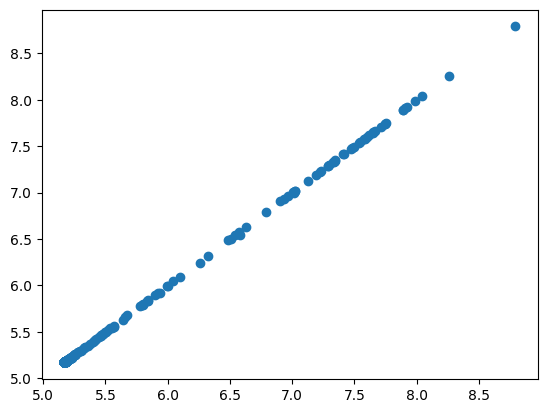

In [18]:
sim = sims[0]
tag = tags[-1]

with h5py.File(output_file, 'r') as output_hf:

    x = output_hf[f'{sim}/{tag}/Galaxy/details/blackhole_mass'][:] 
    y = output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_mass'][:] 

    print(x)
    print(len(x))
    print(len(y))

    y = y[x>0.0]
    x = x[x>0.0]

    print(np.min(np.log10(x)), np.max(np.log10(x)))
    print(np.min(np.log10(y)), np.max(np.log10(y)))

    plt.scatter(np.log10(x),np.log10(y))
    plt.show()

Check new and old accretion rates

-16.404141216576587 0.22223301819383504
-16.554185347924548 -0.08140148599804563


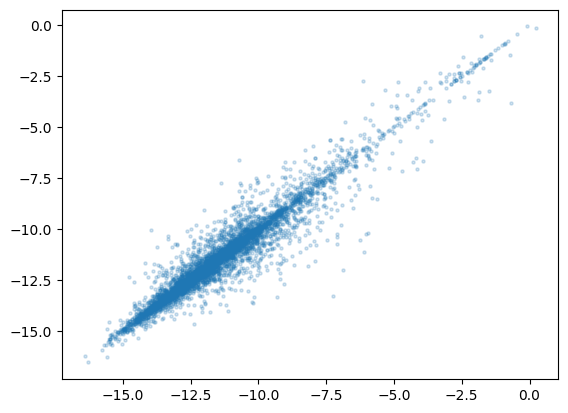

In [19]:
sim = sims[0]
tag = tags[-1]

with h5py.File(output_file, 'r') as output_hf:

    x = output_hf[f'{sim}/{tag}/Galaxy/master/blackhole_accretion_rate/instant'][:] 
    y = output_hf[f'{sim}/{tag}/Galaxy/details/blackhole_accretion_rate/instant'][:] 

    y = y[x>0.0]
    x = x[x>0.0]

    print(np.min(np.log10(x)), np.max(np.log10(x)))
    print(np.min(np.log10(y)), np.max(np.log10(y)))

    plt.scatter(np.log10(x),np.log10(y), s=5, alpha=0.2)
    plt.show()